In [1]:
import pandas as pd
import numpy as np

In [4]:
keywords = pd.read_csv('keywords.csv')
keywords.tail()

,keyword,shows
99995,эльдорадо старый оскол,3705
99996,frigate для firefox,3630
99997,укрсиб,3630
99998,погода в ялте на неделю,3688
99999,ггму,3630


In [5]:
# Задание 1
# Используем файл keywords.csv.

# Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. 
# Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. 
# Если поисковый запрос не содержит названия города, то ставим 'undefined'.

# Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

# Результат классификации запишите в отдельный столбец region.

In [8]:
def define_region(keyword):
    for key, value in geo_data.items():
        if keyword in value:
            return key
    return 'undefined'

In [25]:
keywords['region'] = keywords.apply(lambda row: define_region(row['keyword']), axis=1)

In [28]:
keywords[keywords['region'] != 'undefined']

,keyword,shows,region
1259,москва,153050,Центр
5858,владивосток,43038,Дальний Восток
6075,ярославль,41720,Центр
8977,мурманск,29984,Северо-Запад
9084,хабаровск,29655,Дальний Восток
11222,псков,24885,Северо-Запад
11785,тула,23898,Центр
20823,петербург,14859,Северо-Запад
21445,сахалин,14494,Дальний Восток


In [29]:
# Задание 2
# Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
#    - оценка 2 и меньше - низкий рейтинг
#    - оценка 4 и меньше - средний рейтинг
#    - оценка 4.5 и 5 - высокий рейтинг

# Результат классификации запишите в столбец class

In [30]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
def classify_rating(rating):
    if rating <=2:
        return 'низкий рейтинг'
    elif rating <=4:
        return 'средний рейтинг'
    else:
        return 'высокий рейтинг'

In [34]:
ratings['class'] = ratings.apply(lambda row: classify_rating(row['rating']), axis = 1)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,средний рейтинг
1,1,3,4.0,964981247,средний рейтинг
2,1,6,4.0,964982224,средний рейтинг
3,1,47,5.0,964983815,высокий рейтинг
4,1,50,5.0,964982931,высокий рейтинг


In [35]:
# Задание 3
# Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). 
# Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. 
# Ответ дайте в днях.

In [66]:
fans = ratings.groupby('userId').agg({'movieId': 'count', 'timestamp':['min','max']}).reset_index()
fans = fans[fans['movieId']['count'] >= 100]

In [71]:
Lifetime = (fans['timestamp']['max'] - fans['timestamp']['min']).mean() / 3600 / 24
Lifetime

511.4615975955794

Задание 4
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [72]:
years = np.arange(1950, 2011)
years

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010])

In [74]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [78]:
def production_year(title):
    for year in years:
        if str(year) in title:
            return year
    return 1900

In [82]:
movies['year'] = movies.apply(lambda row: production_year(row['title']), axis = 1)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [87]:
movies_rating = movies.merge(ratings, on='movieId')
year_mean_rating = movies_rating.groupby('year').mean().reset_index()[['year','rating']]

In [88]:
import matplotlib.pyplot as plt

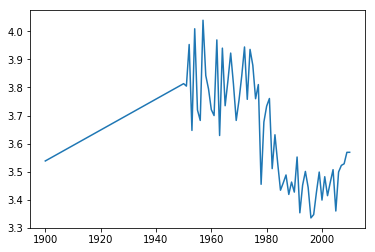

In [89]:
plt.plot(year_mean_rating['year'], year_mean_rating['rating'])

In [ ]:
print('')